Extract data from file, data is now set to global variable data, index = x, value = y

In [21]:
import bocd
from bocd import ConstantHazard, StudentT
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter



data = []
def intialize_data(file_path):
    file = open(file_path)
    i = 0
    for line in file:
        line = line.strip('\n')
        line = float(line)
        data.append(line)
        i += 1


In [24]:

intialize_data("/Users/patrickwilson/Desktop/Chem E python tests/data/Frames/ws100t50.txt")

#data = savgol_filter(data, 500, 3)

In [23]:

intialize_data("data/std_Dev/ws100t50.txt")

FileNotFoundError: [Errno 2] No such file or directory: 'data/std_Dev/ws100t50.txt'

In [25]:
#make the data into np arrays

values = np.array(data)
frames = np.arange(0, len(data))

hazard = bocd.ConstantHazard(100)
model = bocd.StudentT(mu=70, kappa=0.75, alpha=0.75, beta=0.75)

In [26]:

func = bocd.BayesianOnlineChangePointDetection(hazard=hazard, distribution=model)


In [27]:
changepoint = np.empty(values.shape)


for t, value in enumerate(values):
    func.update(value)
    changepoint[t] = func.rt
    print(f"Changepoint value: {changepoint[t]}. Time: {t}")
    

print(np.shape(changepoint))

/var/folders/qv/mbv1k_3s14571_391jvj74gc0000gn/T/ipykernel_29265/2202726092.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  changepoint[t] = func.rt


Changepoint value: 1.0. Time: 0
Changepoint value: 2.0. Time: 1
Changepoint value: 3.0. Time: 2
Changepoint value: 4.0. Time: 3
Changepoint value: 5.0. Time: 4
Changepoint value: 6.0. Time: 5
Changepoint value: 7.0. Time: 6
Changepoint value: 8.0. Time: 7
Changepoint value: 9.0. Time: 8
Changepoint value: 10.0. Time: 9
Changepoint value: 11.0. Time: 10
Changepoint value: 12.0. Time: 11
Changepoint value: 13.0. Time: 12
Changepoint value: 14.0. Time: 13
Changepoint value: 15.0. Time: 14
Changepoint value: 16.0. Time: 15
Changepoint value: 17.0. Time: 16
Changepoint value: 18.0. Time: 17
Changepoint value: 19.0. Time: 18
Changepoint value: 20.0. Time: 19
Changepoint value: 21.0. Time: 20
Changepoint value: 22.0. Time: 21
Changepoint value: 23.0. Time: 22
Changepoint value: 24.0. Time: 23
Changepoint value: 25.0. Time: 24
Changepoint value: 26.0. Time: 25
Changepoint value: 27.0. Time: 26
Changepoint value: 28.0. Time: 27
Changepoint value: 29.0. Time: 28
Changepoint value: 30.0. Time: 29

In [28]:
index_changes = np.where(np.diff(changepoint)<0)[0]
diff = []
for i in range(1, len(index_changes)):
    diff.append(index_changes[i] - index_changes[i - 1])
print(diff)


[6, 1, 54, 24, 73, 62, 59, 5, 25, 23, 13, 28, 2, 1, 28, 1, 36, 8, 3, 22, 4, 3, 8, 3, 7, 1, 1, 9, 17, 1, 5, 1, 3, 1, 7, 34, 70, 7, 10, 50, 1, 2, 1, 2, 3, 1, 5, 8, 20, 121, 37, 24, 32, 14, 34, 7, 26, 1, 108, 243, 324, 54, 193, 442, 15, 130, 133, 157, 6, 1, 54, 24, 73, 62, 59, 5, 25, 23, 13, 28, 2, 1, 28, 1, 36, 8, 3, 22, 4, 3, 8, 3, 7, 1, 1, 9, 17, 1, 5, 1, 3, 1, 7, 34, 70, 7, 10, 50, 1, 2, 1, 2, 3, 1, 5, 8, 20, 121, 37, 24, 32, 14, 34, 7, 26, 1, 108, 243, 324, 54, 193, 442, 15, 130]


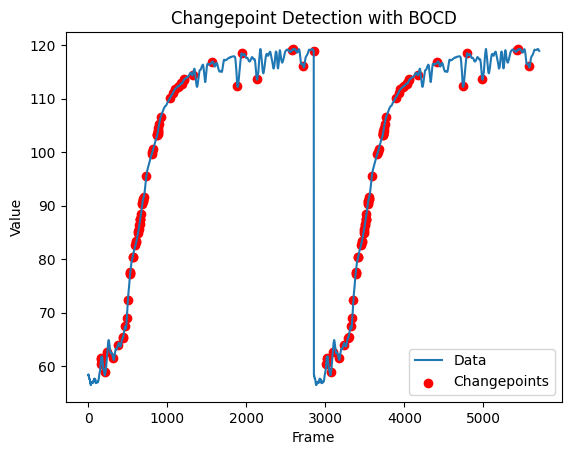

In [29]:
plt.plot(frames, values, label="Data")
plt.scatter(index_changes, values[index_changes], color='red', label="Changepoints")
plt.xlabel("Frame")
plt.ylabel("Value")
plt.title("Changepoint Detection with BOCD")
plt.legend()
plt.show()